In [ ]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('abalone.csv')
df.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
x=df[['LongestShell','Diameter','Height','WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings']]
y=df['Rings']

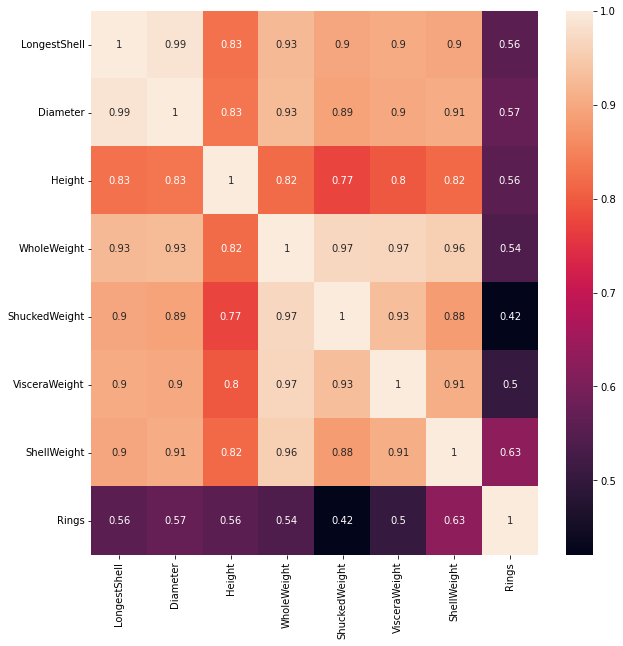

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 10))
corr = df.corr()
sn.heatmap(corr, annot=True)

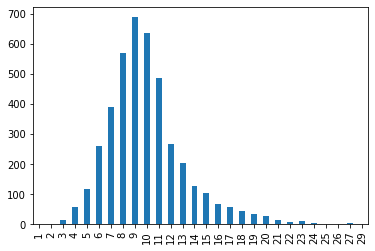

In [ ]:
df['Rings'].value_counts().sort_index().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
x_test=np.array(x_test) 
y_test=np.array(y_test)

**Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDRegressor
clf= SGDRegressor(max_iter=100) 
clf.fit(x_train, y_train)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

SGDRegressor(max_iter=100)

In [ ]:
y_prediction=clf.predict(x_test)
y_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([ 7.00210988, 10.00004715,  8.00186933, ..., 10.99934771,
       16.99448544, 10.99881768])

In [ ]:
print("train accuracy:",100*clf.score(x_train,y_train))
print("test accuracy:",100*clf.score(x_test,y_test))

train accuracy: 99.99993963681086
test accuracy: 99.99994107787788


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


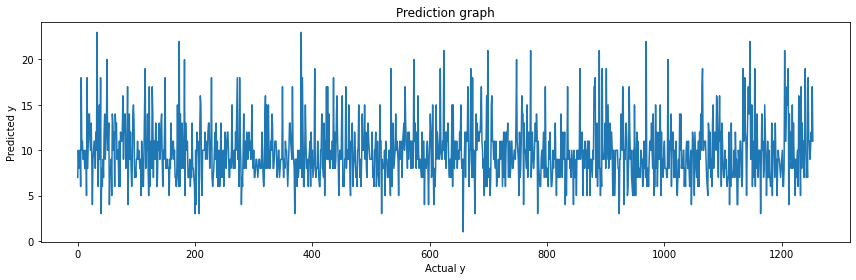

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_prediction)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Prediction graph')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_prediction))

Mean Squared Error: 6.174211182159985e-06


**Naive Bayes Classification**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=10)

from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x=Sc.fit_transform(x)
print('Normalized data:',x[0])

Normalized data: [-0.57455813 -0.43214879 -1.06442415 -0.64189823 -0.60768536 -0.72621157
 -0.63821689  1.57154357]


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train , y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
y_pred

array([ 7, 10,  8, ..., 11, 17, 11])

In [ ]:
print("Train accuracy:",100*nb.score(X_train,y_train))
print("Test accuracy:",100*nb.score(X_test,y_test))

Train accuracy: 100.0
Test accuracy: 99.92025518341308


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


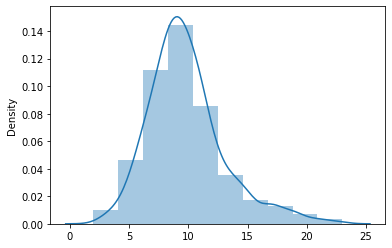

In [ ]:
sn.distplot(y_pred, bins=10, kde=True)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ 7, 10,  8, ..., 11, 17, 11])

In [ ]:
print("train accuracy:",100*knn.score(X_train,y_train))
print("test accuracy:",100*knn.score(X_test,y_test))

train accuracy: 99.6578857338351
test accuracy: 99.68102073365232


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=100)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print("train accuracy:",100*classifier.score(X_train,y_train))
print("test accuracy:",100*classifier.score(X_test,y_test))

train accuracy: 51.65925419089976
test accuracy: 49.601275917065394


**Random Forest Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print("train accuracy:",100*regressor.score(X_train,y_train))
print("test accuracy:",100*regressor.score(X_test,y_test))

train accuracy: 99.99539852460711
test accuracy: 99.92790731304781


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


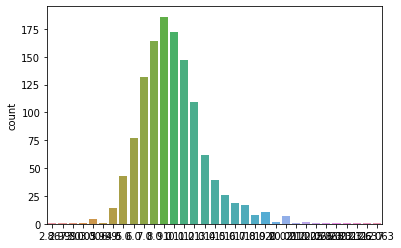

In [ ]:
sn.countplot(y_pred)